<a href="https://colab.research.google.com/github/maxi9113/colab_notebook/blob/main/IC_Ejercicio_jerarquicio_taller_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Circles

In [ ]:
%pip install scipy

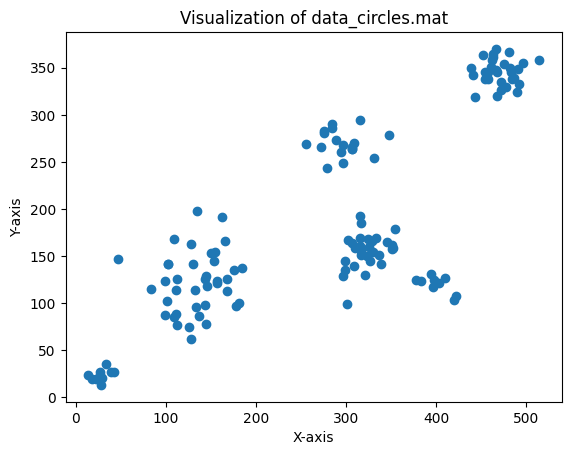

In [ ]:
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Load the .mat file
mat_data = loadmat('/content/drive/MyDrive/Colab Notebooks/Files/data_clusters.mat')
mat_data = mat_data["X"]
# Extract the data (assuming the data is stored in a variable named 'X' and 'Y' in the .mat file)


# Create a scatter plot
plt.scatter(mat_data[:, 0], mat_data[:, 1])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Visualization of data_circles.mat')
plt.show()

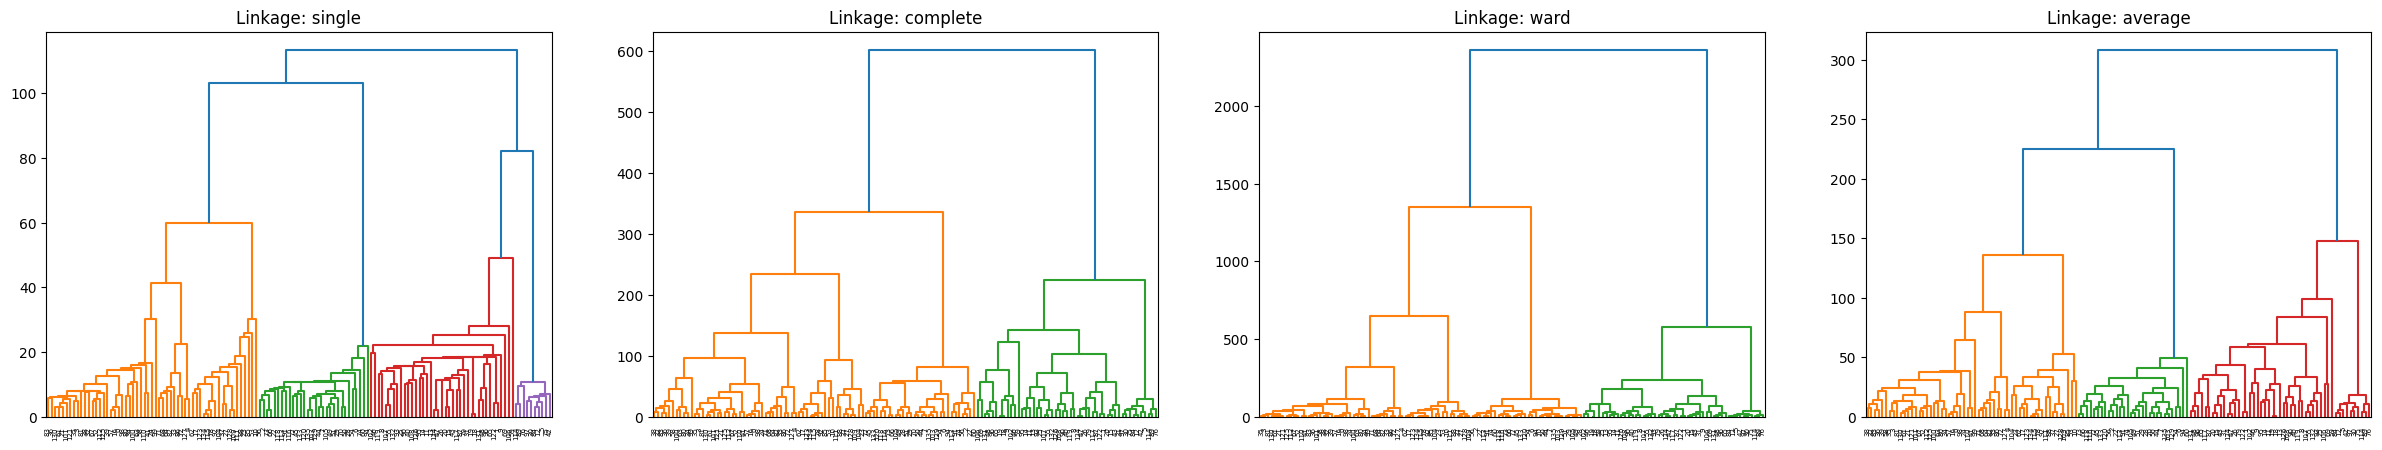

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

# Perform hierarchical clustering
# We use 'ward' linkage which minimizes the variance of the clusters being merged.
# Since X and Y are separate arrays, we need to combine them for clustering.
# Assuming X and Y correspond to the two dimensions of the data points.
# data = mat_data['X'] # Assuming X contains the data points
# If your data has more than one dimension stored in separate arrays, you would combine them like this:
data = np.column_stack((mat_data[:, 0], mat_data[:, 1]))
methods = ['single', 'complete', 'ward', 'average']
linked_method = []

fig, axes = plt.subplots(1, 4, figsize=(30, 5))
for i, method in enumerate(methods):
    linked_clusters = linkage(data, method)
    linked_method.append(linked_clusters)
    dendrogram(linked_clusters,
               orientation='top',
               distance_sort='descending',
               show_leaf_counts=True,
               ax=axes[i])
    axes[i].set_title(f'Linkage: {method}')
plt.show()


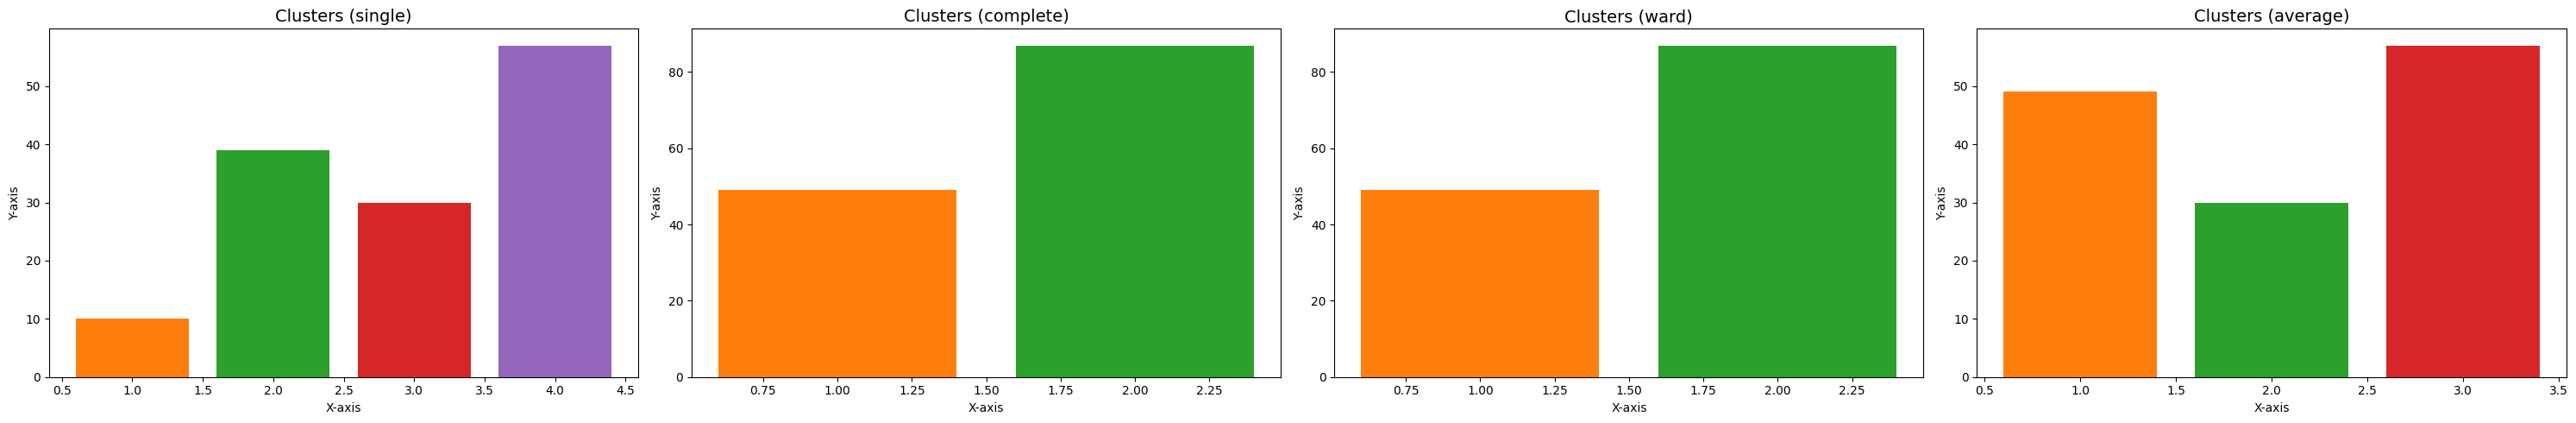

In [ ]:


from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt
from collections import Counter

# Crear figura con 1 fila y 4 columnas
fig, axes = plt.subplots(1, 4, figsize=(30, 5))

# Número de clusters detectados en cada método
max_d = [4, 2, 2, 3]
methods = ['single', 'complete', 'ward', 'average']

for i, method in enumerate(methods):
    # Obtener clusters con fcluster
    clusters = fcluster(linked_method[i], max_d[i], criterion='maxclust')
    conteo = Counter(clusters)
    colors = plt.cm.tab10.colors

    axes[i].bar(conteo.keys(), conteo.values(),
                color=[colors[c % len(colors)] for c in conteo.keys()])

    # Etiquetas y título
    axes[i].set_title(f'Clusters ({method})', fontsize=14)
    axes[i].set_xlabel('X-axis')
    axes[i].set_ylabel('Y-axis')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Files/Frogs_MFCCs.csv')
df = df.drop(columns=["RecordID","Species"])


# Define the new class mapping vamos a agrupar Bufonidae=> por ende todas las subgeneros de Bufonidae-pasaran a Dendrobatidae en este caso luego de analisis de datos Rhinella es el unico genero
class_mapping_updated = {
    'Bufonidae': 'Dendrobatidae'
}
# Apply the updated mapping
df['balanced_family'] = df['Family'].map(class_mapping_updated).fillna(df['Family'])
#segundo paso es eliminar 2000 registros de la familia Leptodactylidae 4420 = 2220
a_family_indices = df[df['balanced_family'] == 'Leptodactylidae'].head(2000).index
df = df.drop(columns=["Family"])
merged_df_normalize = df.drop(a_family_indices)
display(df.head())

# Display the count of each new class in the reduced DataFrame
print("Distribution of Updated Familias ")
display(merged_df_normalize['balanced_family'].value_counts())
display(merged_df_normalize.head())

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Genus,balanced_family
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Adenomera,Leptodactylidae
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Adenomera,Leptodactylidae
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Adenomera,Leptodactylidae
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Adenomera,Leptodactylidae
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Adenomera,Leptodactylidae


Distribution of Updated Familias 


,count
balanced_family,
Leptodactylidae,2420
Hylidae,2165
Dendrobatidae,610


,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Genus,balanced_family
672,1.0,0.192996,-0.103848,0.216192,0.120804,0.109504,0.154796,0.013647,-0.116241,0.067082,...,-0.214675,-0.230585,0.033429,0.214953,0.079759,-0.042802,0.044967,0.023167,Ameerega,Dendrobatidae
673,1.0,0.265533,-0.112521,0.124217,0.149678,0.171732,0.104145,-0.134588,-0.220677,0.047092,...,-0.165175,-0.111237,0.144494,0.177566,-0.088033,-0.119785,0.044567,0.026724,Ameerega,Dendrobatidae
674,1.0,0.310865,0.005342,0.241530,0.207491,0.236536,0.194143,-0.088969,-0.227693,0.064032,...,-0.183258,-0.197144,0.074107,0.193985,-0.020983,-0.086163,0.034122,-0.006974,Ameerega,Dendrobatidae
675,1.0,0.233606,-0.144457,0.160421,0.173649,0.281706,0.231076,-0.088177,-0.178183,0.100693,...,-0.169291,-0.160768,0.050480,0.149043,-0.025132,-0.130774,0.009585,0.026356,Ameerega,Dendrobatidae
676,1.0,0.314685,0.010631,0.154457,0.084394,0.144370,0.201578,0.023881,-0.184819,-0.007558,...,-0.072734,-0.104039,0.081803,0.167648,0.000479,-0.069455,-0.021710,-0.087114,Ameerega,Dendrobatidae


##Separar train/test/validate

In [82]:
from sklearn.model_selection import train_test_split

# Split data into train (80%) and remaining (20%)
df_train_, df_evaluate = train_test_split(merged_df_normalize, test_size=0.2, random_state=42)
df_evaluate_genus  = df_evaluate.copy()
df_train = merged_df_normalize.drop(columns=["Genus","balanced_family"])
print("Training data shape:", df_train.shape)
print("Evalaluate data shape:", df_evaluate.shape)




Training data shape: (5195, 22)
Evalaluate data shape: (1039, 24)


Inertia values: [1782.9710159719968, 1398.0812553900753, 1198.6025839454892, 1090.4511634548435, 988.9898898600134, 922.5273894113817, 842.1006381077789, 783.5201051900808, 729.9181875890014, 689.715000772649, 663.1481752936955, 634.1810593702232, 613.250138458001, 591.7213761366065, 582.5980624828144, 555.4829974646166, 540.8570467297579, 529.7474416003623, 516.0121273955331, 506.0607022094374, 492.121137450712, 484.24199124874355, 473.6078327813408, 466.2312717027401, 457.5154505235691, 456.4289748340522, 445.55202362160793, 438.9911398345995]
Silhouette scores: [np.float64(0.3084751801095259), np.float64(0.33849885986007794), np.float64(0.3437530703494662), np.float64(0.3533397897049222), np.float64(0.2875100519744815), np.float64(0.29353077359888136), np.float64(0.3251427139789236), np.float64(0.3124710243398612), np.float64(0.3229865557491581), np.float64(0.3308877593681327), np.float64(0.3397777149186904), np.float64(0.34246221837500523), np.float64(0.34555020471377673), np.float

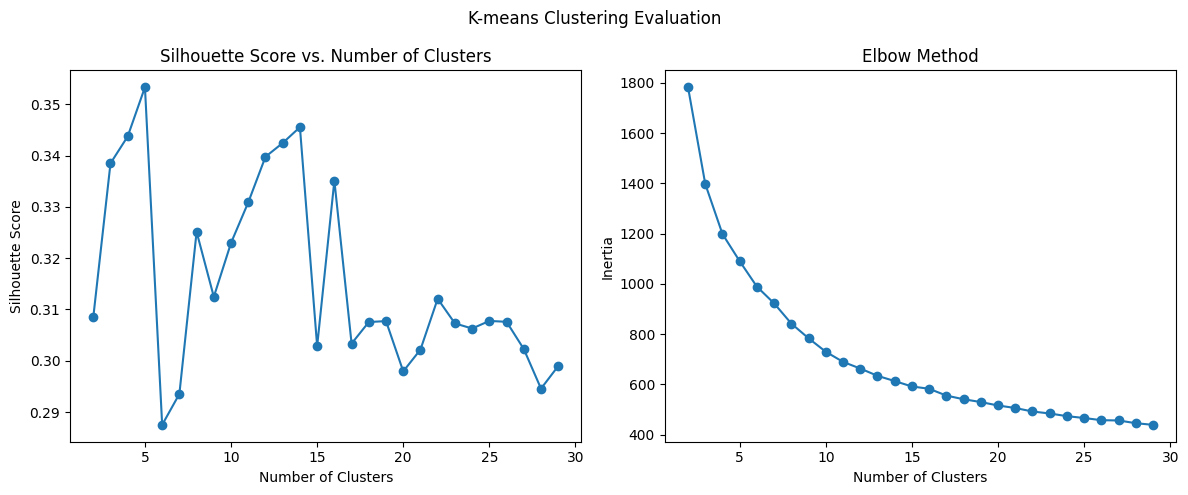

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia = []
silhouette_scores = []

for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_train)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(df_train, kmeans.labels_)
    silhouette_scores.append(score)

print("Inertia values:", inertia)
print("Silhouette scores:", silhouette_scores)



fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('K-means Clustering Evaluation')

# Silhouette Score plot
axes[0].plot(range(2, 30), silhouette_scores, marker='o')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Silhouette Score vs. Number of Clusters')

# Elbow Method plot
axes[1].plot(range(2, 30), inertia, marker='o')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Inertia')
axes[1].set_title('Elbow Method')

plt.tight_layout()
plt.show()

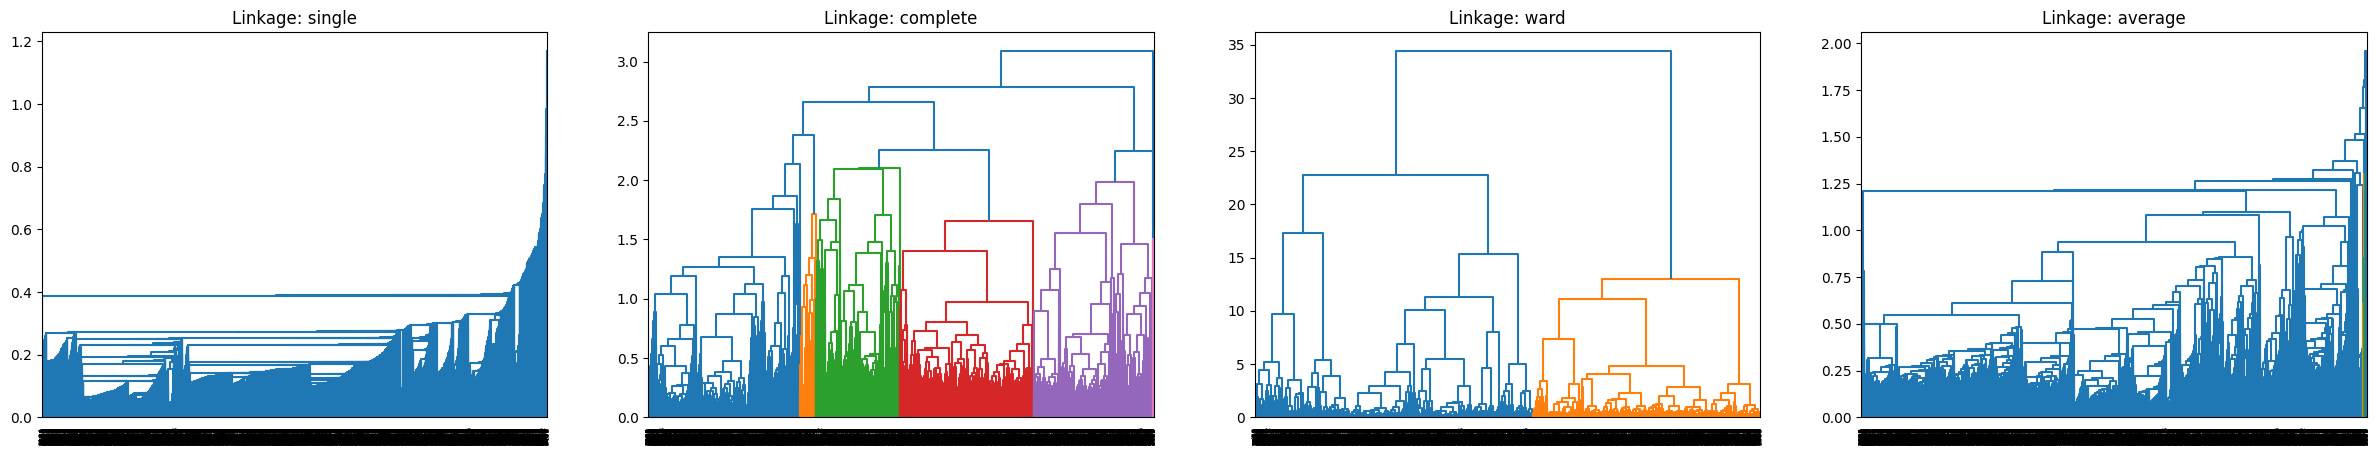

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

data = df_train.values

methods = ['single', 'complete', 'ward', 'average']
linked_method = []

fig, axes = plt.subplots(1, 4, figsize=(30, 5))
for i, method in enumerate(methods):
    linked_clusters = linkage(data, method)
    linked_method.append(linked_clusters)
    dendrogram(linked_clusters,
               orientation='top',
               distance_sort='descending',
               show_leaf_counts=True,
               ax=axes[i])
    axes[i].set_title(f'Linkage: {method}')
plt.show()





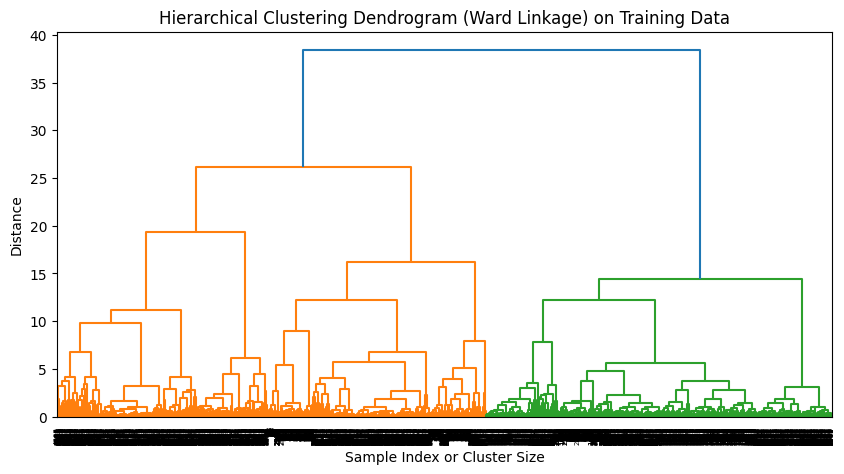

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

# Use X_train for hierarchical clustering
data = df_train.values

# Perform hierarchical clustering with 'ward' linkage
linked_clusters_ward = linkage(data, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked_clusters_ward,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage) on Training Data')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

In [ ]:
clusters = fcluster(linked_clusters_ward, t=2, criterion='maxclust')
df_train["cluster"] = clusters
display(df_train)

cols_features = [col for col in df_train.columns if col != "cluster"]

df_evaluate = df_evaluate.merge(
    df_train[cols_features + ["cluster"]],
    on=cols_features,
    how="left"
)
agrupado = (
    df_evaluate
    .groupby(["cluster", "balanced_family"])
    .size()
    .reset_index(name="cantidad")
    .sort_values("cantidad", ascending=False)
)

display(agrupado)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,cluster
672,1.0,0.192996,-0.103848,0.216192,0.120804,0.109504,0.154796,0.013647,-0.116241,0.067082,...,-0.134075,-0.214675,-0.230585,0.033429,0.214953,0.079759,-0.042802,0.044967,0.023167,2
673,1.0,0.265533,-0.112521,0.124217,0.149678,0.171732,0.104145,-0.134588,-0.220677,0.047092,...,-0.082496,-0.165175,-0.111237,0.144494,0.177566,-0.088033,-0.119785,0.044567,0.026724,2
674,1.0,0.310865,0.005342,0.241530,0.207491,0.236536,0.194143,-0.088969,-0.227693,0.064032,...,-0.054492,-0.183258,-0.197144,0.074107,0.193985,-0.020983,-0.086163,0.034122,-0.006974,2
675,1.0,0.233606,-0.144457,0.160421,0.173649,0.281706,0.231076,-0.088177,-0.178183,0.100693,...,-0.131823,-0.169291,-0.160768,0.050480,0.149043,-0.025132,-0.130774,0.009585,0.026356,2
676,1.0,0.314685,0.010631,0.154457,0.084394,0.144370,0.201578,0.023881,-0.184819,-0.007558,...,-0.017361,-0.072734,-0.104039,0.081803,0.167648,0.000479,-0.069455,-0.021710,-0.087114,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,2
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,2
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,2
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,2


,cluster,balanced_family,cantidad
1,1,Leptodactylidae,423
3,2,Hylidae,397
2,2,Dendrobatidae,133
4,2,Leptodactylidae,54
0,1,Hylidae,32


In [ ]:
# Define the mapping from cluster labels to balanced family names
cluster_to_family_mapping = {
    1: 'Leptodactylidae',
    2: 'Hylidae'
}

# Replace the cluster labels in the 'cluster' column of df_evaluate
df_evaluate['predicted_family'] = df_evaluate['cluster'].replace(cluster_to_family_mapping)

# Display the updated DataFrame with the new 'predicted_family' column
display(df_evaluate.head())

# Display the value counts of the new 'predicted_family' column to verify the replacement
print("\nDistribution of Predicted Families:")
display(df_evaluate['predicted_family'].value_counts())

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Genus,balanced_family,cluster,predicted_family
0,1.0,0.295599,0.593915,0.373547,0.076801,0.155037,0.048388,-0.179880,0.129172,0.193519,...,0.064843,-0.053824,-0.063556,-0.019174,0.036175,0.105548,Hypsiboas,Hylidae,2,Hylidae
1,1.0,0.174381,0.068632,0.306350,0.401263,0.187340,-0.179895,-0.160168,0.081109,0.209226,...,-0.224454,-0.100147,0.130947,0.105057,-0.002812,-0.142588,Ameerega,Dendrobatidae,2,Hylidae
2,1.0,0.294218,0.804890,0.375896,-0.324858,0.345737,0.366765,-0.274473,0.004614,0.264637,...,0.085945,0.031628,-0.028692,0.072370,0.072371,-0.074430,Leptodactylus,Leptodactylidae,2,Hylidae
3,1.0,0.564329,0.388723,0.210168,0.037160,0.140299,0.055578,-0.031388,0.088662,0.076147,...,0.006375,0.003056,0.044542,-0.013489,-0.001896,0.050980,Hypsiboas,Hylidae,2,Hylidae
4,1.0,0.212997,0.303120,0.302054,0.152182,0.202291,0.125354,-0.154379,-0.054431,0.105831,...,0.121852,0.034841,-0.002391,0.012819,-0.032602,-0.022817,Hypsiboas,Hylidae,2,Hylidae



Distribution of Predicted Families:


,count
predicted_family,
Hylidae,584
Leptodactylidae,455


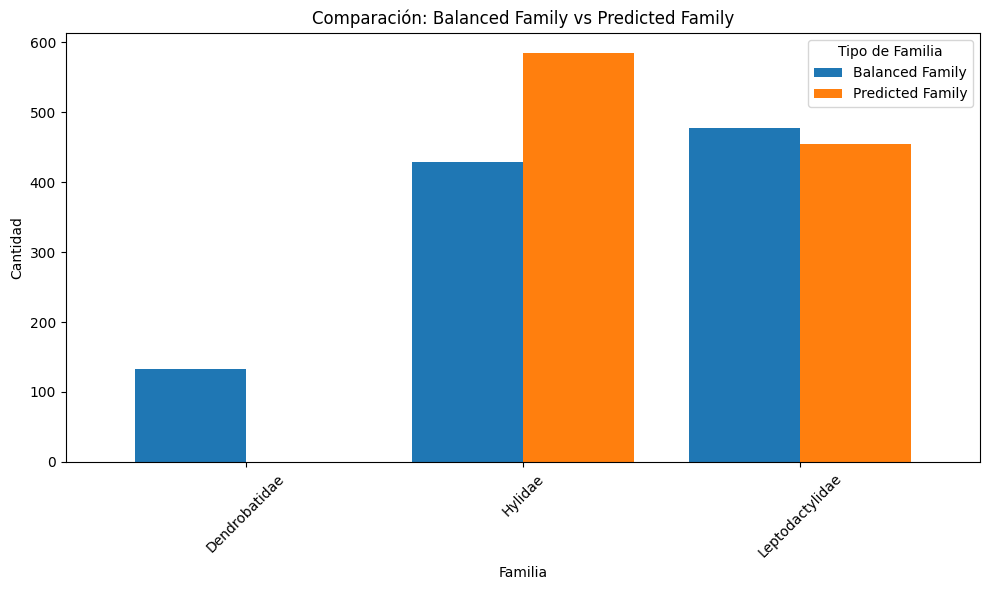

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Contar las ocurrencias
family_counts_eval = df_evaluate['balanced_family'].value_counts().sort_index()
predicted_family_counts_eval = df_evaluate['predicted_family'].value_counts().sort_index()

# Unir ambas series en un mismo DataFrame
df_plot = pd.DataFrame({
    'Balanced Family': family_counts_eval,
    'Predicted Family': predicted_family_counts_eval
}).fillna(0)

# Crear la gráfica combinada
ax = df_plot.plot(
    kind='bar',
    figsize=(10, 6),
    width=0.8
)

plt.xlabel('Familia')
plt.ylabel('Cantidad')
plt.title('Comparación: Balanced Family vs Predicted Family')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Familia')
plt.tight_layout()
plt.show()


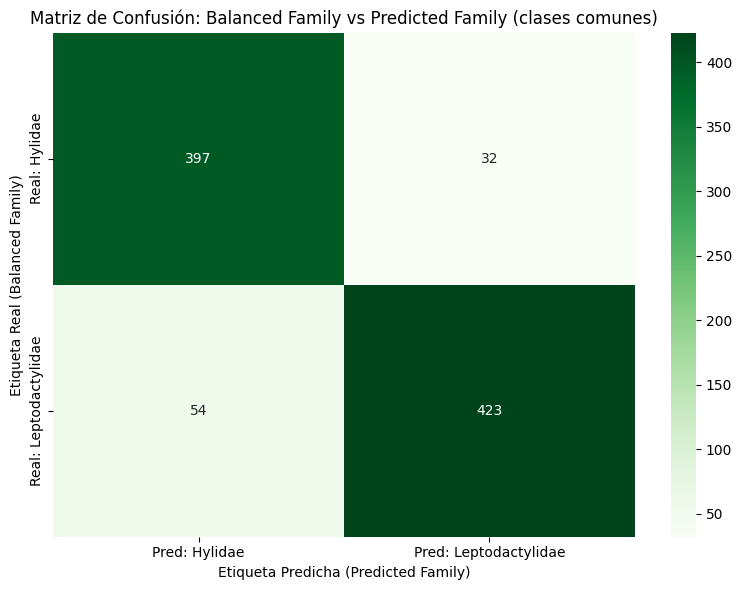

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ✅ Obtener solo las clases que existen en ambos campos
common_labels = sorted(list(set(df_evaluate['balanced_family']) & set(df_evaluate['predicted_family'])))

# Crear matriz de confusión con etiquetas comunes
conf_mat = confusion_matrix(
    df_evaluate['balanced_family'],
    df_evaluate['predicted_family'],
    labels=common_labels
)

# Convertir a DataFrame para mejor visualización
conf_df = pd.DataFrame(
    conf_mat,
    index=[f"Real: {c}" for c in common_labels],
    columns=[f"Pred: {c}" for c in common_labels]
)

# Graficar como mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de Confusión: Balanced Family vs Predicted Family (clases comunes)")
plt.ylabel("Etiqueta Real (Balanced Family)")
plt.xlabel("Etiqueta Predicha (Predicted Family)")
plt.tight_layout()
plt.show()


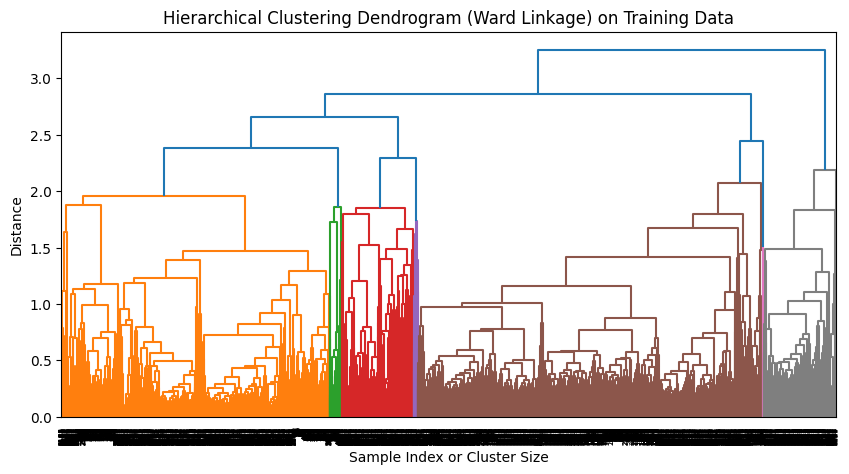

In [79]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

# Use X_train for hierarchical clustering
data = df_train.values

# Perform hierarchical clustering with 'ward' linkage
linked_clusters_complete = linkage(data, 'complete')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked_clusters_complete,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage) on Training Data')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

In [83]:
clusters = fcluster(linked_clusters_complete, t=2, criterion='maxclust')
df_train["cluster_complete"] = clusters
display(df_train)

cols_features = [col for col in df_train.columns if col != "cluster"]

df_evaluate = df_evaluate.merge(
    df_train[cols_features + ["cluster_complete"]],
    on=cols_features,
    how="left"
)
agrupado = (
    df_evaluate
    .groupby(["cluster_complete", "Genus"])
    .size()
    .reset_index(name="cantidad")
    .sort_values("cantidad", ascending=False)
)

display(agrupado)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,cluster_complete
672,1.0,0.192996,-0.103848,0.216192,0.120804,0.109504,0.154796,0.013647,-0.116241,0.067082,...,-0.134075,-0.214675,-0.230585,0.033429,0.214953,0.079759,-0.042802,0.044967,0.023167,2
673,1.0,0.265533,-0.112521,0.124217,0.149678,0.171732,0.104145,-0.134588,-0.220677,0.047092,...,-0.082496,-0.165175,-0.111237,0.144494,0.177566,-0.088033,-0.119785,0.044567,0.026724,2
674,1.0,0.310865,0.005342,0.241530,0.207491,0.236536,0.194143,-0.088969,-0.227693,0.064032,...,-0.054492,-0.183258,-0.197144,0.074107,0.193985,-0.020983,-0.086163,0.034122,-0.006974,2
675,1.0,0.233606,-0.144457,0.160421,0.173649,0.281706,0.231076,-0.088177,-0.178183,0.100693,...,-0.131823,-0.169291,-0.160768,0.050480,0.149043,-0.025132,-0.130774,0.009585,0.026356,2
676,1.0,0.314685,0.010631,0.154457,0.084394,0.144370,0.201578,0.023881,-0.184819,-0.007558,...,-0.017361,-0.072734,-0.104039,0.081803,0.167648,0.000479,-0.069455,-0.021710,-0.087114,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,2
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,2
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,2
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,2


ValueError: The column label 'cluster_complete' is not unique.